# EXPLORATORY NOTEBOOK FOR ESI AGGREGATION

In [1]:
import matplotlib.pylab as plt
import geopandas as gp
import rioxarray as rxr
import pandas as pd
import numpy as np

import requests # request img from web
import shutil 

import os 
import urllib.request

from os.path import expanduser as base_dir


# LOAD DATA

In [3]:
#WORLD SHAPEFILE 
w_sf = gp.read_file(base_dir('~/SF_live/Data/World_Countries_(Generalized)'))

In [ ]:
w_sf.geometry.plot()

In [332]:
w_sf[w_sf.AFF_ISO=='GB']

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
6,7,Anguilla,AI,United Kingdom,GB,0.468389,0.007798,"POLYGON ((-63.16778 18.16445, -63.15695 18.177..."
24,25,Bermuda,BM,United Kingdom,GB,0.391095,0.002055,"POLYGON ((-64.82306 32.26055, -64.78237 32.280..."
32,33,British Indian Ocean Territory,IO,United Kingdom,GB,0.849597,0.007405,"POLYGON ((72.43254 -7.43474, 72.42720 -7.41416..."
33,34,British Virgin Islands,VG,United Kingdom,GB,0.639368,0.009867,"MULTIPOLYGON (((-64.66085 18.38389, -64.66724 ..."
43,44,Cayman Islands,KY,United Kingdom,GB,0.733613,0.017932,"POLYGON ((-81.39501 19.32611, -81.36959 19.308..."
74,75,Falkland Islands,FK,United Kingdom,GB,19.082564,1.495383,"MULTIPOLYGON (((-59.34806 -52.34305, -59.37945..."
87,88,Gibraltar,GI,United Kingdom,GB,0.144833,0.000786,"POLYGON ((-5.33451 36.16256, -5.33748 36.14895..."
95,96,Guernsey,GG,United Kingdom,GB,0.416945,0.009025,"POLYGON ((-2.59084 49.42249, -2.59722 49.42249..."
109,110,Isle of Man,IM,United Kingdom,GB,1.295170,0.085147,"POLYGON ((-4.77778 54.05555, -4.78715 54.06166..."
114,115,Jersey,JE,United Kingdom,GB,0.576976,0.015395,"POLYGON ((-2.06695 49.16777, -2.08916 49.18111..."


In [42]:
w_sf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
w_sf[w_sf.COUNTRY =='Angola']

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
5,6,Angola,AO,Angola,AO,58.87347,103.813059,"MULTIPOLYGON (((23.47611 -17.62584, 23.28916 -..."


In [9]:
# ∞ AGRICULTURAL LAND PER COUNTRY 
world_bank_data = pd.read_csv(base_dir('~/SF_live/Data/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_4669757/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_4669757.csv'), header = 2)

In [10]:
#COUNTRY CODE ISO MAPPING 
country_codes = pd.read_csv(base_dir('~/SF_live/Data/country_mapping.csv'))
a2_a3 = country_codes[['alpha-2', 'alpha-3']]

In [11]:
wb_coded = world_bank_data.set_index('Country Code').join(a2_a3.set_index('alpha-3'), how='inner')

In [12]:
wb_coded.head()

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66,alpha-2
ABW,Aruba,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN,AW
AFG,Afghanistan,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.801696,57.893688,57.970348,58.066940,58.070006,58.128268,...,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.807476,NaN,NaN,AF
AGO,Angola,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.237443,36.261506,36.277549,36.301612,36.317655,36.341718,...,43.901699,44.346924,44.792155,45.237371,45.682594,45.682594,45.682594,NaN,NaN,AO
ALB,Albania,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,...,42.857299,42.857664,43.127737,42.856971,42.849672,42.846715,42.538504,NaN,NaN,AL
AND,Andorra,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,40.000000,40.021277,40.042553,40.042553,40.063830,40.000000,39.829787,NaN,NaN,AD


In [226]:
#GET GEOMETRY
geoms = wb_coded.set_index('alpha-2').join(w_sf.set_index('ISO'))

In [255]:
argentina = geoms[geoms['Country Name'].str.contains('Argentina')]
argentina

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2020,2021,Unnamed: 66,FID,COUNTRY,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
AR,Argentina,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,50.363395,49.853655,49.283989,48.70738,48.153061,47.849044,...,39.603229,NaN,NaN,10.0,Argentina,Argentina,AR,138.751348,278.308965,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806..."


Hong Kong SAR, China
Macao SAR, China
Namibia


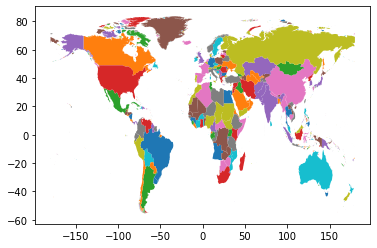

In [230]:
#PLOT COUNTRY SHAPEFILES
fig,ax = plt.subplots() 

for g, country in zip(geoms.geometry, geoms['Country Name']):
    try:
        xs, ys = g.exterior.xy    
        ax.fill(xs, ys)
    except:
        try:
            for geom in g.geoms:  
                xs, ys = geom.exterior.xy    
                ax.fill(xs, ys)
        except:
            print(country) 
        

# Tif data

In [19]:
path = base_dir('~/SF_live/Data/DFPPM_4WK_2022092.tif')

In [20]:
tif = rxr.open_rasterio(path)

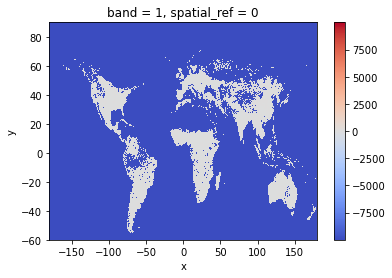

In [21]:
tif.plot(cmap=plt.cm.coolwarm)

In [349]:
ds_masked = tif.where(tif!=-9999.)

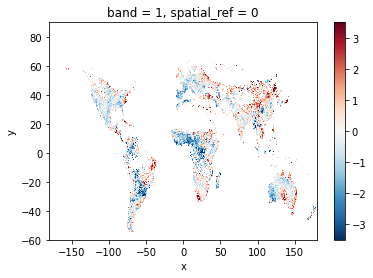

In [350]:
fig, ax = plt.subplots()

ds_masked.plot(ax=ax)

Hong Kong SAR, China
Macao SAR, China
Namibia


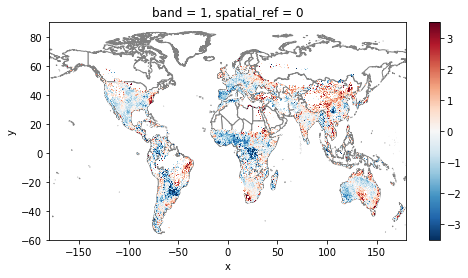

In [351]:
fig, ax = plt.subplots(figsize=(8,4) )

for g, country in zip(geoms.geometry, geoms['Country Name']):
    try:
        xs, ys = g.exterior.xy    
        ax.fill(xs, ys, edgecolor='grey', facecolor='white')
    except:
        try:
            for geom in g.geoms:  
                xs, ys = geom.exterior.xy    
                ax.fill(xs, ys, edgecolor='grey', facecolor='white')
        except:
            print(country) 
        
ds_masked.plot(ax=ax)        

# Argentina

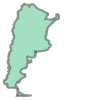

In [164]:
argentina.geometry[0]

tif.rio.clip([argentina.geometry[0]])

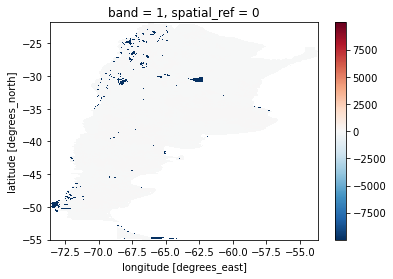

In [185]:
clipped = tif.rio.clip([argentina.geometry[0]])

clipped.plot()

In [187]:
clipped.sum(), clipped.count()

(<xarray.DataArray ()>
 array(-18840144., dtype=float32)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(111313)
 Coordinates:
     spatial_ref  int64 0)

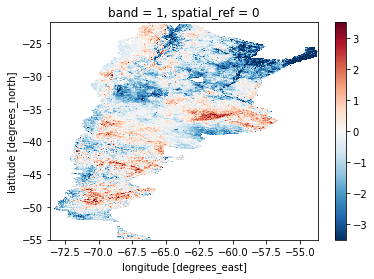

In [238]:
A= clipped

A.where(A!=-9999.).plot()

# Calc mean ESI per country

In [299]:
test = A.where(A!=-9999.)
results = pd.DataFrame(columns = ['country_iso', 'mean_esi'])

for country_ISO, country_geom in zip(geoms.index, geoms.geometry): 
    try:
        clipped = tif.rio.clip([country_geom[0]])
        masked = clipped.where(clipped!=-9999.)
        mean_esi = masked.mean().values.tolist()
        results = results.append({'country_iso': country_ISO, 'mean_esi': mean_esi}, ignore_index=True)
    except:
        print(country_ISO)


AD


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


AF
AL


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

AS
AT
AW


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


BA
BB
BE
BF
BG
BI
BJ
BM


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


BO


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


BT
BW
BY


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


CD
CF
CG
CH
CM


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

CR
CW
CY
CZ


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


DJ
DM
DZ


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


EG


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


ET


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

GD
GE
GH
GI
GM
GN


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


GT
GU
GY
HK


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

HU


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


IM
IQ


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


IS
JM
JO


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


KG
KH
KN
KP


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


KY
KZ
LA
LB
LC
LI
LR
LS
LU
LV
LY
MA
MC
MD
ME
MF


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

MK
ML
MN
MO


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


MT
MV


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

NE
NI


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


NP
NR


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


PE


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


PK
PL


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


PT
PT
PY
QA
RO
RS
RW


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


SD
SG
SI
SK
SM
SN
SO
SR
SS


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


SV
SX
SY
SZ
TD
TG
TJ


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


TM


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

UA
UG
UY
UZ
VC


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])
/var/folders/n5/_2d3c5sd5j38

ZM
ZW
nan


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3850788273.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  clipped = tif.rio.clip([country_geom[0]])


In [300]:
df

,mean_esi,FID,COUNTRY,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
AE,0.562874,237,United Arab Emirates,United Arab Emirates,AE,16.759676,6.239850,"MULTIPOLYGON (((56.36027 25.42111, 56.36555 25..."
AG,NaN,9,Antigua and Barbuda,Antigua and Barbuda,AG,1.162901,0.045626,"MULTIPOLYGON (((-61.73806 16.98972, -61.82917 ..."
AM,-0.600436,11,Armenia,Armenia,AM,12.161117,3.142291,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
AO,-0.254404,6,Angola,Angola,AO,58.873470,103.813059,"MULTIPOLYGON (((23.47611 -17.62584, 23.28916 -..."
AR,-0.476370,10,Argentina,Argentina,AR,138.751348,278.308965,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806..."
...,...,...,...,...,...,...,...,...
VN,0.564559,247,Vietnam,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
VU,0.069874,244,Vanuatu,Vanuatu,VU,16.411468,1.037135,"MULTIPOLYGON (((167.10782 -15.12370, 167.13136..."
WS,NaN,196,Samoa,Samoa,WS,3.019662,0.245519,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
YE,0.784064,249,Yemen,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."


In [336]:
single_list, single_g, mult_list, mult_g = [], [], [], []
for ISO , g , esri in zip(df.index, df.geometry, df.mean_esi): 
 
    try: 
        if len(g.geoms)>1:
            mult_list.append(esri)
            mult_g.append(g)
        
    except:
        print(ISO)
        single_list.append(esri)
        single_g.append(g)


        
        

PT
PT


In [337]:
df[df.index =='PT']

,mean_esi,FID,COUNTRY,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
PT,NaN,16,Azores,Portugal,PT,6.522579,0.264656,"MULTIPOLYGON (((-25.01765 36.97208, -25.01285 ..."
PT,NaN,133,Madeira,Portugal,PT,1.251754,0.074427,"POLYGON ((-17.10250 32.82333, -17.05305 32.809..."
PT,NaN,180,Portugal,Portugal,PT,19.453696,9.302484,"POLYGON ((-8.64555 41.01858, -8.65722 41.04194..."


In [334]:
df = results.set_index('country_iso').join(w_sf.set_index('ISO') )

In [335]:
df

,mean_esi,FID,COUNTRY,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
AE,0.562874,237,United Arab Emirates,United Arab Emirates,AE,16.759676,6.239850,"MULTIPOLYGON (((56.36027 25.42111, 56.36555 25..."
AG,NaN,9,Antigua and Barbuda,Antigua and Barbuda,AG,1.162901,0.045626,"MULTIPOLYGON (((-61.73806 16.98972, -61.82917 ..."
AM,-0.600436,11,Armenia,Armenia,AM,12.161117,3.142291,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
AO,-0.254404,6,Angola,Angola,AO,58.873470,103.813059,"MULTIPOLYGON (((23.47611 -17.62584, 23.28916 -..."
AR,-0.476370,10,Argentina,Argentina,AR,138.751348,278.308965,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806..."
...,...,...,...,...,...,...,...,...
VN,0.564559,247,Vietnam,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
VU,0.069874,244,Vanuatu,Vanuatu,VU,16.411468,1.037135,"MULTIPOLYGON (((167.10782 -15.12370, 167.13136..."
WS,NaN,196,Samoa,Samoa,WS,3.019662,0.245519,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
YE,0.784064,249,Yemen,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_12480/3006298682.py:9: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for g in geom:


Hong Kong SAR, China
Macao SAR, China
Namibia


Text(0.5, 1.0, 'ESI raw data, clipped to remove -9999.')

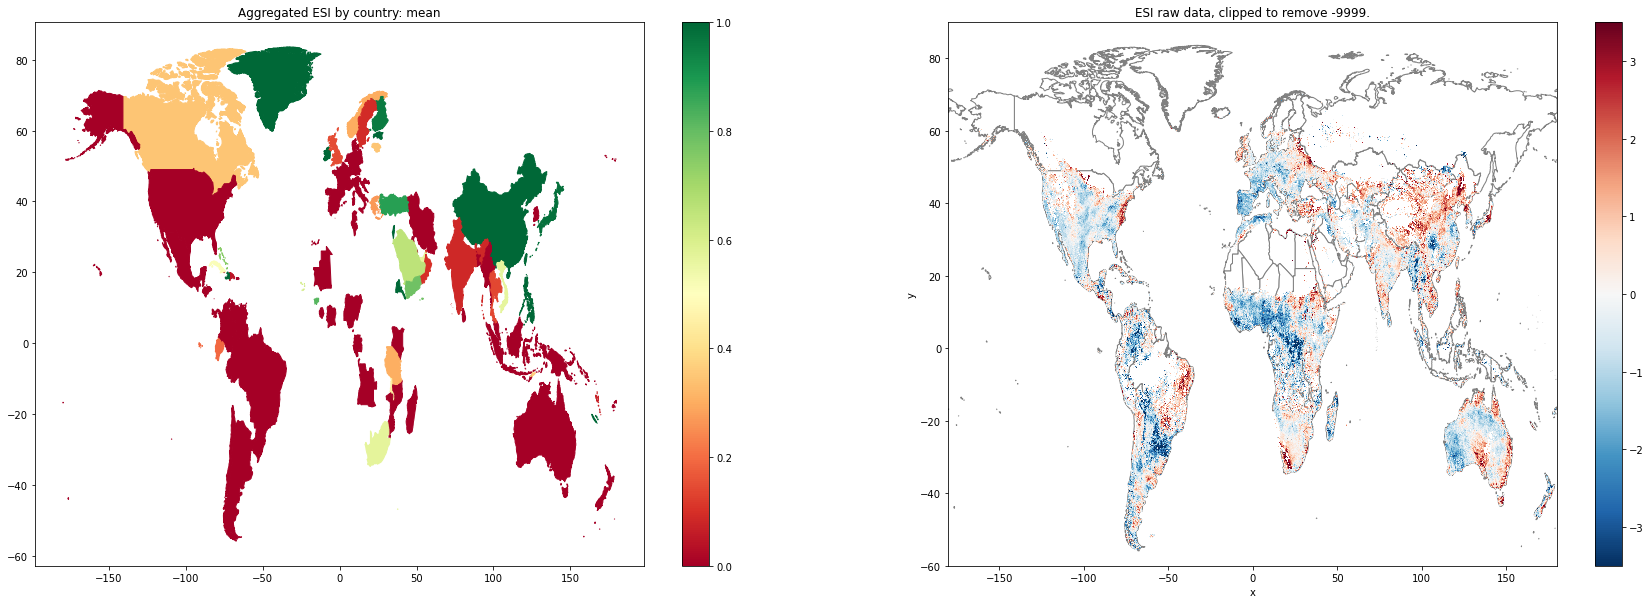

In [348]:


fig,ax = plt.subplots(ncols = 2, figsize = (30,10) )
ax=ax.ravel()

cmap = plt.get_cmap('RdYlGn')
color_list = [ cmap(x) for x in mult_list]

# .plot(ax=ax, facecolor = color_list, edgecolor = 'grey' ,  cmap=cmap)
for col, geom in zip(color_list, mult_g):
    for g in geom:
        xs, ys = g.exterior.xy    
        ax[0].fill(xs, ys, color = col)
ax[0].set_title('Aggregated ESI by country: mean')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax[0])


for g, country in zip(geoms.geometry, geoms['Country Name']):
    try:
        xs, ys = g.exterior.xy    
        ax[1].fill(xs, ys, edgecolor='grey', facecolor='white')
    except:
        try:
            for geom in g.geoms:  
                xs, ys = geom.exterior.xy    
                ax[1].fill(xs, ys, edgecolor='grey', facecolor='white')
        except:
            print(country) 
        
ds_masked.plot(ax=ax[1])   
ax[1].set_title('ESI raw data, clipped to remove -9999.')

# Download tifs 

In [172]:
base_path = 'https://gis1.servirglobal.net/data/esi/4WK/'
months = ['08', '09', '10', ]
days = ['2', '3', '16' ,'19', '20' , '21']
urls = [base_path + '{}/DFPPM_4WK_{}{}{}.tif'.format(YYYY, YYYY, MM, D) for YYYY in [2022] for MM in months for D in days]

['https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022082.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022083.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220816.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220819.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220820.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220821.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022092.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022093.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220916.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220919.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220920.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220921.tif', 'https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022102.tif', 'https://gis1.servirglobal.net/data/esi/4W

In [352]:
u = urls[0]
data_folder = '/Users/gracecolverd/Hackathon/Data/'
output_path = os.path.join(data_folder,u.split('/')[-1] )
output_path


'/Users/gracecolverd/Hackathon/Data/DFPPM_4WK_2022082.tif'

In [353]:
for u in urls:
    output_path = os.path.join(data_folder, u.split('/')[-1] )
    try:
        urllib.request.urlretrieve(u, output_path)
        print('{} success'.format(u))
    except:
        print('{} error'.format(u))

https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022082.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022083.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220816.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220819.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220820.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220821.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022092.tif success
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022093.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220916.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220919.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220920.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_20220921.tif error
https://gis1.servirglobal.net/data/esi/4WK/2022/DFPPM_4WK_2022102.tif error
ht